In [11]:
import h5py
import numpy as np

hdf5_path = '/home/sj/HYBRID-RL/release/cfgs/data/metaworld/Assembly_frame_stack_1_96x96_end_on_success/dataset.hdf5'
with h5py.File( hdf5_path, 'r') as f:
    for demo_name in f["data"].keys():
        demo_group = f["data"][demo_name]

        if demo_name == "demo_0":
            prop_data = demo_group["obs"]["prop"]
            prop_data = np.array(prop_data)
            print(prop_data[:, :-1])
            print(prop_data[2, -1])


[[0.00604339 0.59989514 0.19412519]
 [0.00791668 0.5981276  0.19169624]
 [0.01584724 0.59567164 0.18464028]
 [0.02902306 0.59497105 0.1743124 ]
 [0.04497937 0.59670351 0.16271619]
 [0.05950162 0.59992159 0.152035  ]
 [0.07325823 0.60263612 0.143295  ]
 [0.08635991 0.60452154 0.1357577 ]
 [0.09710695 0.60584675 0.12933586]
 [0.10411176 0.60609181 0.12214934]
 [0.10739121 0.60517939 0.1118871 ]
 [0.10901865 0.60405747 0.09996449]
 [0.11044738 0.60313437 0.08808127]
 [0.11207463 0.60236405 0.07727147]
 [0.1136845  0.60159428 0.06800623]
 [0.11650279 0.60179162 0.06364983]
 [0.12057476 0.60302638 0.06808136]
 [0.12262196 0.60311447 0.07941016]
 [0.12225937 0.60165613 0.09524356]
 [0.12058353 0.59930109 0.11354474]
 [0.11866376 0.5968565  0.13300102]
 [0.11708622 0.59483332 0.15290032]
 [0.11588398 0.59331119 0.1725444 ]
 [0.11481661 0.5921433  0.1907469 ]
 [0.11380818 0.59131782 0.206403  ]
 [0.11205603 0.59393113 0.21914186]
 [0.10903019 0.60360933 0.22877581]
 [0.10580627 0.61845867 0.23

In [3]:
import numpy as np
import re
import csv
file_path = "/home/sj/HYBRID-RL/log/boxclose/our_attempt4/train_only_dense.log"
output_csv_path = "/home/sj/HYBRID-RL/log/boxclose/our_attempt4/train_only_dense.csv"# Initialize a dictionary to store log entries
log_entries = {}
with open(file_path, 'r') as f:
    lines = f.readlines()
    loglist = ["other/elapsed_time", "other/episode", "other/replay", "other/speed", "other/step", "other/train_step", "score/num_success", "score/score"]
loglist = np.array(loglist)
loglist = np.char.strip(loglist)
for line in lines:
    stripped_line = line.strip()
    match = re.search(r"^(\d+): (.+?)\s+:\s+([-+]?\d*\.\d+|\d+)$", stripped_line)
    if match:
        timestep = int(match.group(1))
        log_entry = match.group(2)
        value = match.group(3)
        if any(log in log_entry for log in loglist):
            if timestep not in log_entries:
                log_entries[timestep] = {}
            log_entries[timestep][log_entry] = value# Ensure all timesteps have all log entries, filling missing ones with ''
for timestep in log_entries:
    for log in loglist:
        if log not in log_entries[timestep]:
            log_entries[timestep][log] = ''# Write the log entries to a CSV file
with open(output_csv_path, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=["timestep"] + list(loglist))
    writer.writeheader()
    for timestep in sorted(log_entries.keys()):
        row_data = {"timestep": timestep}
        row_data.update(log_entries[timestep])
        writer.writerow(row_data)


Assembly environment Our attempt 2 vs IBRL

Write the log data in csv file

Assembly BC final score: 0.54


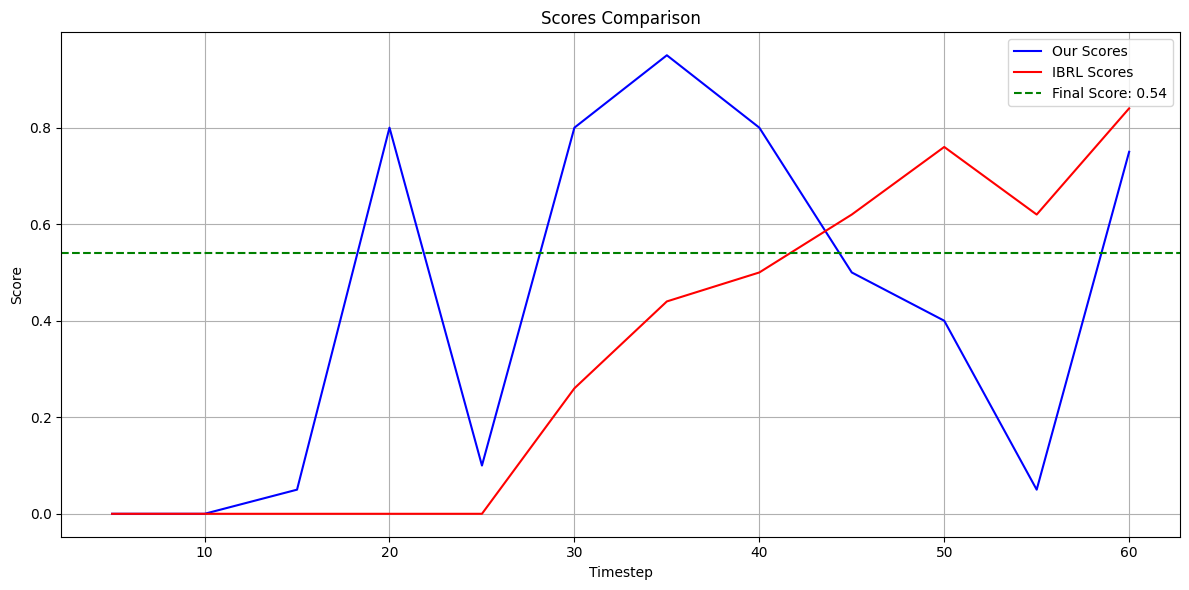

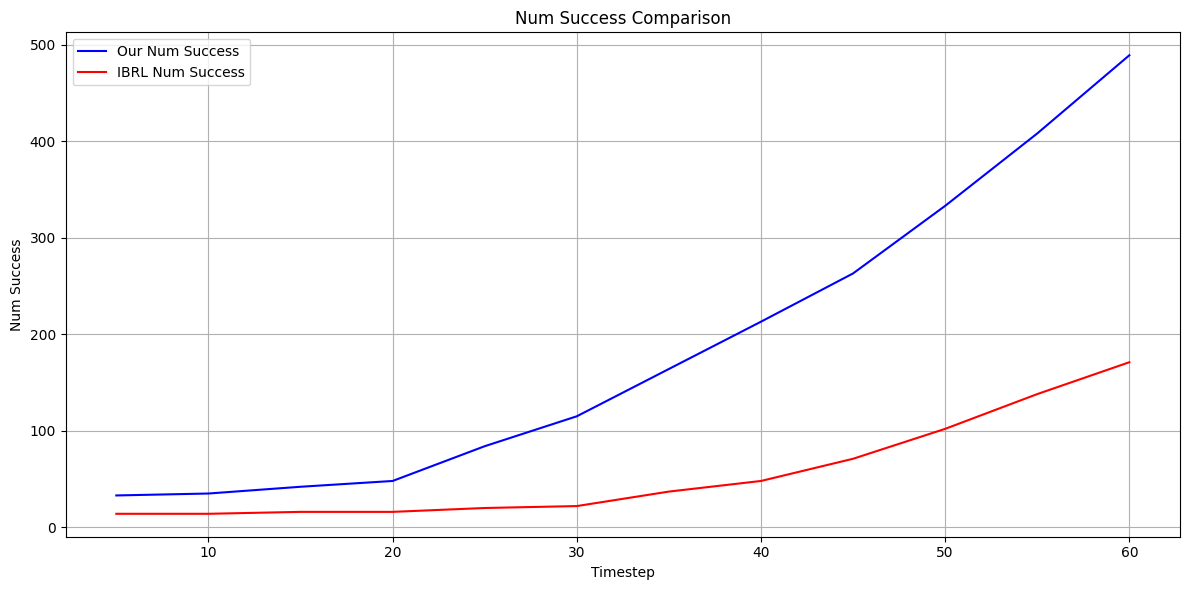

In [3]:
import csv
import matplotlib.pyplot as plt
import re

# File paths
assembly_bc_log = "/home/sj/HYBRID-RL/log/bc/train_assembly_bc.log"
output_csv_path = [
    "/home/sj/HYBRID-RL/log/assembly/our_attempt2/train_assembly_att2.csv",
    "/home/sj/HYBRID-RL/log/assembly/ibrl_attempt1/output_ibrl_assembly.csv"
]

# Initialize lists to store scores and num_success from both scenarios
scores_our = []
scores_ibrl = []
num_successes_our = []
num_successes_ibrl = []
steps = []
assembly_bc = []

# Extract final_score from log file
with open(assembly_bc_log, 'r') as log_file:
    lines = log_file.readlines()
    for line in lines:
        match = re.search(r'final_score\s*:\s*([0-9.]+)', line)
        if match:
            final_score = float(match.group(1))
            break

print(f"Assembly BC final score: {final_score}")

# Read data from CSV files
for csv_path in output_csv_path:
    with open(csv_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            timestep = int(row['timestep'])
            if timestep <= 60000:  # Filter based on timestep condition
                score = float(row['score/score'])
                num_success = int(row['score/num_success'])

                if timestep not in steps:
                    steps.append(timestep)
                
                if 'our' in csv_path:
                    scores_our.append(score)
                    num_successes_our.append(num_success)
                elif 'ibrl' in csv_path:
                    scores_ibrl.append(score)
                    num_successes_ibrl.append(num_success)

steps = [x / 1000 for x in steps]

# Plotting scores
plt.figure(figsize=(12, 6))

plt.plot(steps, scores_our, label='Our Scores', linestyle='-', color='b')
plt.plot(steps, scores_ibrl, label='IBRL Scores', linestyle='-', color='r')

# Draw final_score as a flat dashed line
plt.axhline(y=final_score, color='g', linestyle='--', label=f'Final Score: {final_score}')

plt.title('Scores Comparison')
plt.xlabel('Timestep')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting num_successes
plt.figure(figsize=(12, 6))

plt.plot(steps, num_successes_our, label='Our Num Success', linestyle='-', color='b')
plt.plot(steps, num_successes_ibrl, label='IBRL Num Success', linestyle='-', color='r')

plt.title('Num Success Comparison')
plt.xlabel('Timestep')
plt.ylabel('Num Success')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Boxclose Environment Our attempt2 vs IBRL

Assembly BC final score: 0.34


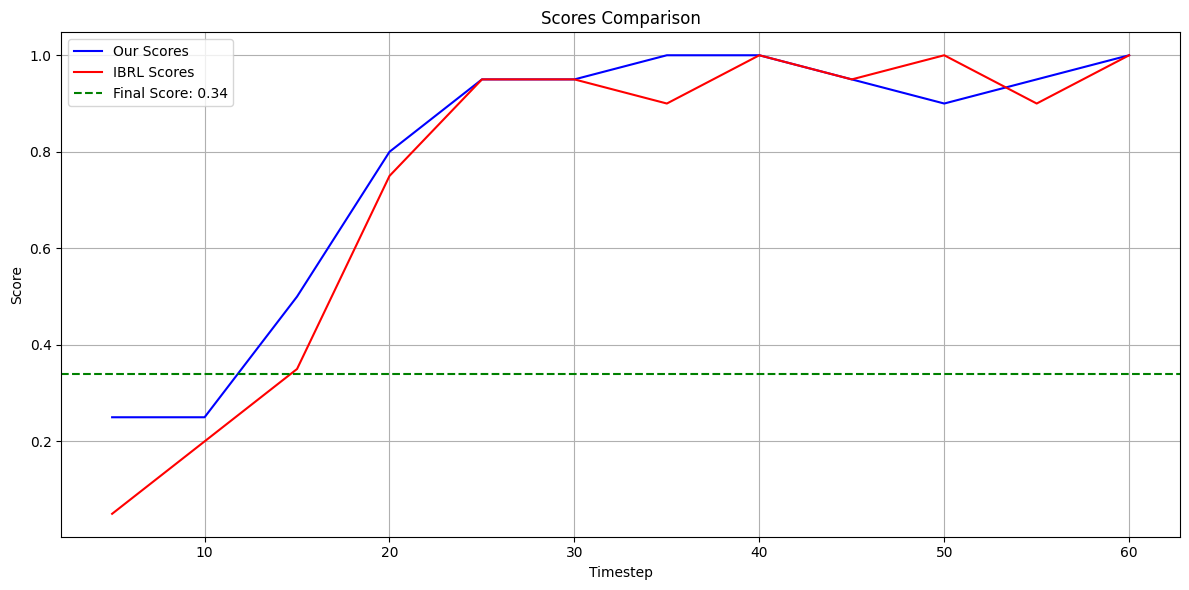

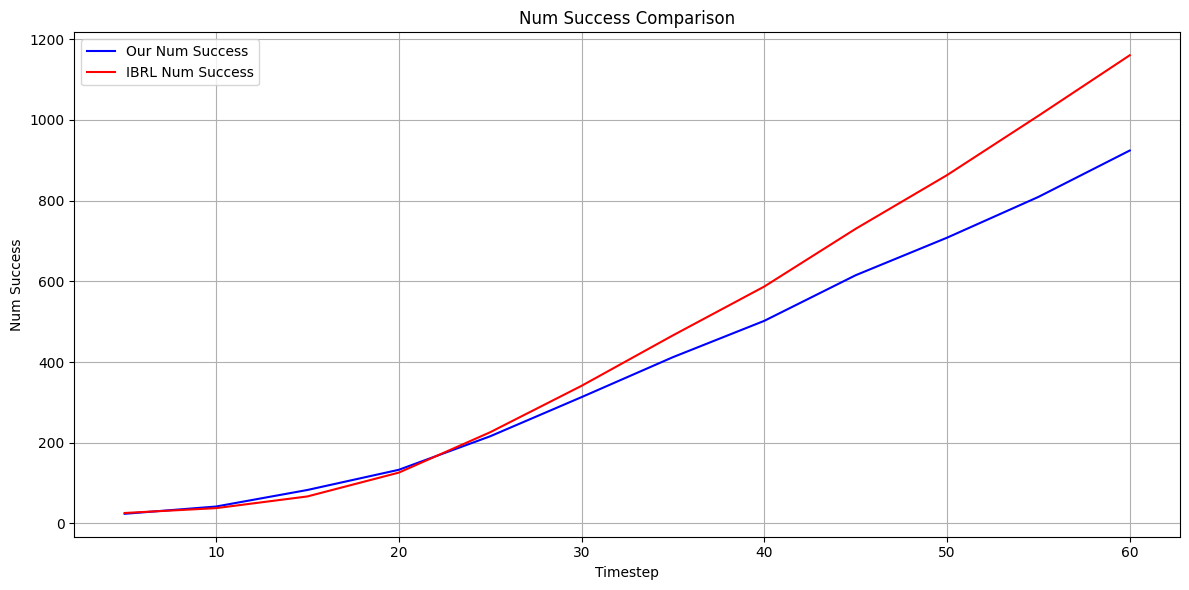

In [4]:
import csv
import matplotlib.pyplot as plt
import re

# File paths
assembly_bc_log_boxclose = "/home/sj/HYBRID-RL/log/bc/train_boxclose_bc.log"
output_csv_path5 = [
    "/home/sj/HYBRID-RL/log/boxclose/our_attempt4/train_only_dense.csv",
    "/home/sj/HYBRID-RL/log/boxclose/ibrl_attempt1/output_boxclose_ibrl.csv"
]

# Initialize lists to store scores and num_success from both scenarios
scores_our_boxclose = []
scores_ibrl_boxclose = []
num_successes_our_box_close = []
num_successes_ibrl_box_close = []
steps_box_close = []

# Extract final_score from log file
with open(assembly_bc_log_boxclose, 'r') as log_file:
    lines = log_file.readlines()
    for line in lines:
        match = re.search(r'final_score\s*:\s*([0-9.]+)', line)
        if match:
            final_score = float(match.group(1))
            break

print(f"Assembly BC final score: {final_score}")

# Read data from CSV files
for csv_path in output_csv_path5:
    with open(csv_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            timestep = int(row['timestep'])
            if timestep <= 60000:  # Filter based on timestep condition
                score_boxclose = float(row['score/score'])
                num_successboxclose = int(row['score/num_success'])

                if timestep not in steps_box_close:
                    steps_box_close.append(timestep)

                if 'our' in csv_path:
                    scores_our_boxclose.append(score_boxclose)
                    num_successes_our_box_close.append(num_successboxclose)
                elif 'ibrl' in csv_path:
                    scores_ibrl_boxclose.append(score_boxclose)
                    num_successes_ibrl_box_close.append(num_successboxclose)

steps_box_close = [x / 1000 for x in steps_box_close]

# Plotting scores
plt.figure(figsize=(12, 6))

plt.plot(steps_box_close, scores_our_boxclose, label='Our Scores', linestyle='-', color='b')
plt.plot(steps_box_close, scores_ibrl_boxclose, label='IBRL Scores', linestyle='-', color='r')

# Draw final_score as a flat dashed line
plt.axhline(y=final_score, color='g', linestyle='--', label=f'Final Score: {final_score}')

plt.title('Scores Comparison')
plt.xlabel('Timestep')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting num_successes
plt.figure(figsize=(12, 6))

plt.plot(steps_box_close, num_successes_our_box_close, label='Our Num Success', linestyle='-', color='b')
plt.plot(steps_box_close, num_successes_ibrl_box_close, label='IBRL Num Success', linestyle='-', color='r')

plt.title('Num Success Comparison')
plt.xlabel('Timestep')
plt.ylabel('Num Success')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Stick Pull Environment our Attempt 2 vs IBRL

Assembly BC final score: 0.12


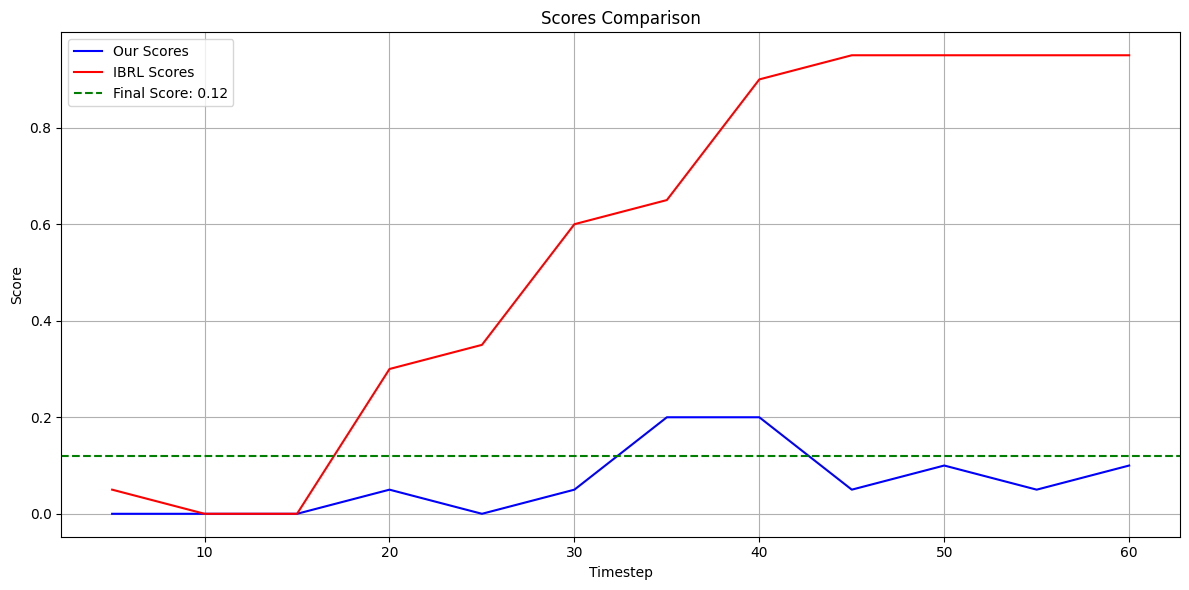

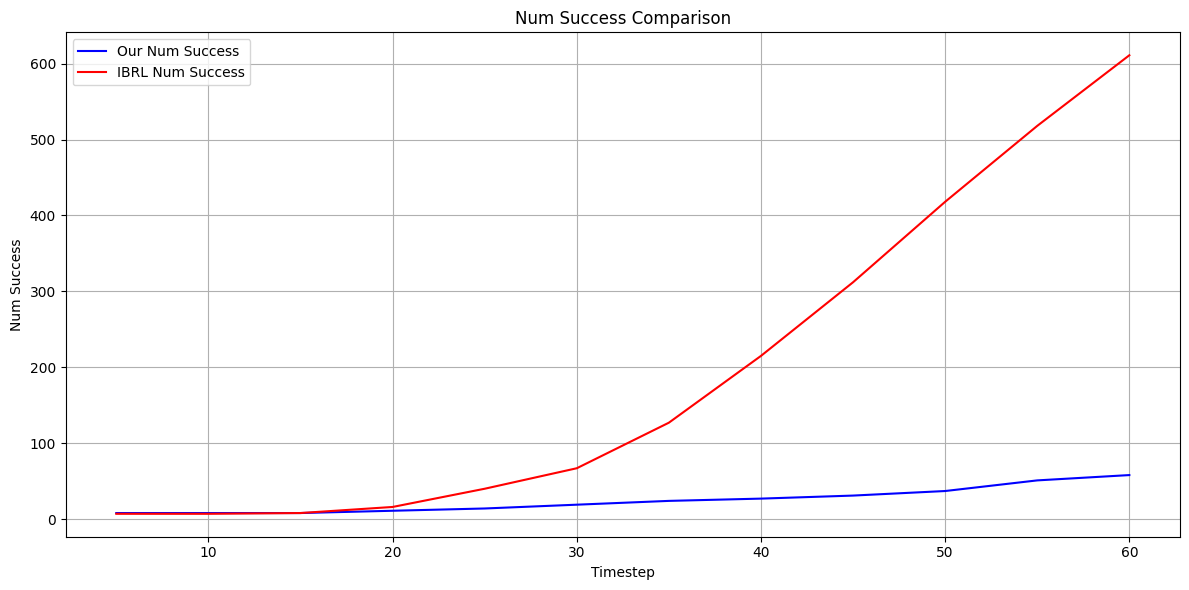

In [55]:
import csv
import matplotlib.pyplot as plt
import re

# File paths
assembly_bc_log = "/home/sj/HYBRID-RL/log/bc/train_stick_pull_bc.log"
output_csv_path = [
    "/home/sj/HYBRID-RL/log/stick_pull/our/output_stick_pull.csv",
    "/home/sj/HYBRID-RL/log/stick_pull/ibrl/output_ibrl_stickpull.csv"
]

# Initialize lists to store scores and num_success from both scenarios
scores_our = []
scores_ibrl = []
num_successes_our = []
num_successes_ibrl = []
steps = []
assembly_bc = []

# Extract final_score from log file
with open(assembly_bc_log, 'r') as log_file:
    lines = log_file.readlines()
    for line in lines:
        match = re.search(r'final_score\s*:\s*([0-9.]+)', line)
        if match:
            final_score = float(match.group(1))
            break

print(f"Assembly BC final score: {final_score}")

# Read data from CSV files
for csv_path in output_csv_path:
    with open(csv_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            timestep = int(row['timestep'])
            if timestep <= 60000:  # Filter based on timestep condition
                score = float(row['score/score'])
                num_success = int(row['score/num_success'])

                if timestep not in steps:
                    steps.append(timestep)
                
                if 'our' in csv_path:
                    scores_our.append(score)
                    num_successes_our.append(num_success)
                elif 'ibrl' in csv_path:
                    scores_ibrl.append(score)
                    num_successes_ibrl.append(num_success)

steps = [x / 1000 for x in steps]

# Plotting scores
plt.figure(figsize=(12, 6))

plt.plot(steps, scores_our, label='Our Scores', linestyle='-', color='b')
plt.plot(steps, scores_ibrl, label='IBRL Scores', linestyle='-', color='r')

# Draw final_score as a flat dashed line
plt.axhline(y=final_score, color='g', linestyle='--', label=f'Final Score: {final_score}')

plt.title('Scores Comparison')
plt.xlabel('Timestep')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting num_successes
plt.figure(figsize=(12, 6))

plt.plot(steps, num_successes_our, label='Our Num Success', linestyle='-', color='b')
plt.plot(steps, num_successes_ibrl, label='IBRL Num Success', linestyle='-', color='r')

plt.title('Num Success Comparison')
plt.xlabel('Timestep')
plt.ylabel('Num Success')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Coffee Push Environment Our Attempt 2 vs IBRL

Assembly BC final score: 0.44


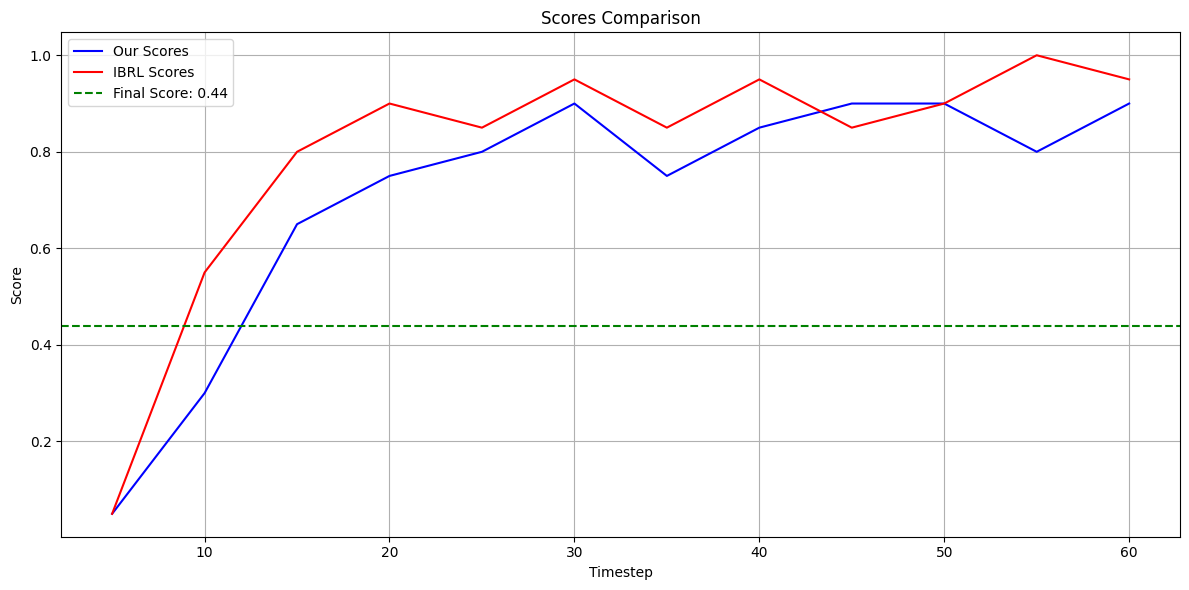

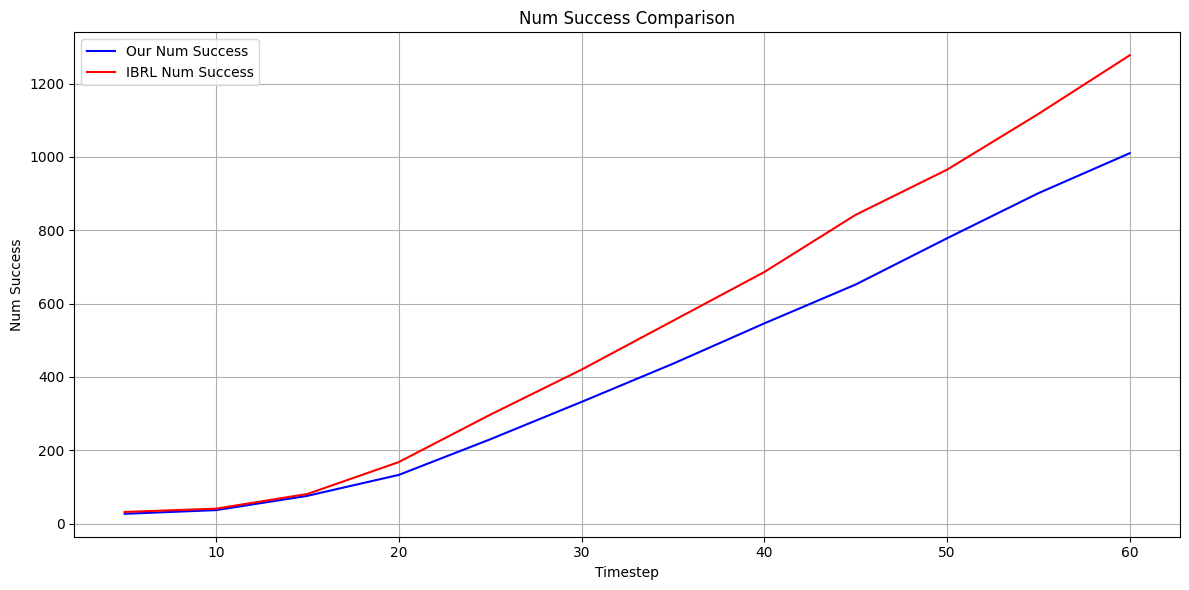

In [7]:
import csv
import matplotlib.pyplot as plt
import re

# File paths
assembly_bc_log = "/home/sj/HYBRID-RL/log/bc/train_coffee_push_bc.log"
output_csv_path = [
    "/home/sj/HYBRID-RL/log/coffee_push/our_attempt2/train_coffeepush_our.csv",
    "/home/sj/HYBRID-RL/log/coffee_push/ibrl/output_ibrl_coffeepush.csv"
]

# Initialize lists to store scores and num_success from both scenarios
scores_our = []
scores_ibrl = []
num_successes_our = []
num_successes_ibrl = []
steps = []
assembly_bc = []

# Extract final_score from log file
with open(assembly_bc_log, 'r') as log_file:
    lines = log_file.readlines()
    for line in lines:
        match = re.search(r'final_score\s*:\s*([0-9.]+)', line)
        if match:
            final_score = float(match.group(1))
            break

print(f"Assembly BC final score: {final_score}")

# Read data from CSV files
for csv_path in output_csv_path:
    with open(csv_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            timestep = int(row['timestep'])
            if timestep <= 60000:  # Filter based on timestep condition
                score = float(row['score/score'])
                num_success = int(row['score/num_success'])

                if timestep not in steps:
                    steps.append(timestep)
                
                if 'our' in csv_path:
                    scores_our.append(score)
                    num_successes_our.append(num_success)
                elif 'ibrl' in csv_path:
                    scores_ibrl.append(score)
                    num_successes_ibrl.append(num_success)

steps = [x / 1000 for x in steps]

# Plotting scores
plt.figure(figsize=(12, 6))

plt.plot(steps, scores_our, label='Our Scores', linestyle='-', color='b')
plt.plot(steps, scores_ibrl, label='IBRL Scores', linestyle='-', color='r')

# Draw final_score as a flat dashed line
plt.axhline(y=final_score, color='g', linestyle='--', label=f'Final Score: {final_score}')

plt.title('Scores Comparison')
plt.xlabel('Timestep')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting num_successes
plt.figure(figsize=(12, 6))

plt.plot(steps, num_successes_our, label='Our Num Success', linestyle='-', color='b')
plt.plot(steps, num_successes_ibrl, label='IBRL Num Success', linestyle='-', color='r')

plt.title('Num Success Comparison')
plt.xlabel('Timestep')
plt.ylabel('Num Success')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
